# Medical cost of people characterized by certain attributes

## Data Description :-
#### The data at hand contains medical costs of people characterized by certain attributes.
### Domain :- 
#### Healthcare
### Context :-
#### Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like <br>the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data <br> can be an invaluable skill to have.

## Attribute Information:
<ul>
    <li>age: age of primary beneficiary</li>
    <li>sex: insurance contractor gender, female, male</li>
    <li>bmi: Body mass index, providing an understanding of body, weights that are relatively
high or low relative to height, objective index of body weight ($ \frac{kg}{m^2} $) using the
ratio of height to weight, ideally 18.5 to 24.9</li>
    <li>children: Number of children covered by health insurance / Number of dependents smoker: Smoking</li>
    <li>region: the beneficiary's residential area in the US, northeast, southeast, southwest,northwest.</li>
    <li>charges: Individual medical costs billed by health insurance.</li>
</ul>    


## Objective:
#### We want to see if we can dive deep into this data to find some valuable insights.

### Tasks to perform:

<ol>    
    <li>Import the necessary libraries</li>
    <li>Read the data as a data frame</li>
    <li>Perform basic EDA which should include the following and print out your insights at every step
        <ul>
            <li>a. Shape of the data.</li>
            <li>b. Data type of each attribute.</li>
            <li>c. Checking the presence of missing values.</li>
            <li>d. 5 point summary of numerical attributes.</li>
            <li>e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.</li>
            <li>f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns.</li>
            <li>g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns.</li>
            <li>h. Distribution of categorical columns (include children).</li>
            <li>i. Pair plot that includes all the columns of the data frame.</li>
        </ul></li>
    <li>Answer the following questions with statistical evidence
        <ul>
            <li>a. Do charges of people who smoke differ significantly from the people who don't?</li>
            <li>b. Does bmi of males differ significantly from that of females?</li>
            <li>c. Is the proportion of smokers significantly different in different genders?</li>
            <li>d. Is the distribution of bmi across women with no children, one child and two children, 
                the same?</li>
        </ul>
    </li>
</ol>    
    

### 1. Import the necessary libraries

In [1]:
#importing the nessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

### 2. Read the data as a data frame

In [3]:
#Reading the data file in dataframe 
df = pd.read_csv('insurance.csv')

# checking first 5 lines of data frame

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA which should include the following and print out your insights at every step
#### a. Shape of the data.

In [6]:
#To get info No. of Rows and Attributes

df.shape

(1338, 7)

In [78]:
#get the attributes name

print(df.columns)

#get the records information

print(df.index)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
RangeIndex(start=0, stop=1338, step=1)


#### b. Data type of each attribute.

In [19]:
#to get the data type of each attributes

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [80]:
#to get the complete information of attributes (like how many not null values in that attribute, datatype of attribute etc) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null object
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


#### c. Checking the presence of missing values.

In [81]:
#checking null values count in each attributes

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### There is no null value in any attribute

In [83]:
#checking not null values in each attributes
df.notnull().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

___
#### d. 5 point summary of numerical attributes.

In [84]:
# five point summary of contineous attributes
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [85]:
#five point summary of contineous attributes in transpose 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<h4>
<ul>
    <li>- 'age' and 'bmi' data is normal distributed as mean and 50% are closer to each other </li>
    <br>
    <li>-  75% people has less or equal to 2 children</li>
    <br>
    <li>- 'charges' data is higly skewed as mean and 50% values have big difference</li>
</ul>
</h4>

#### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

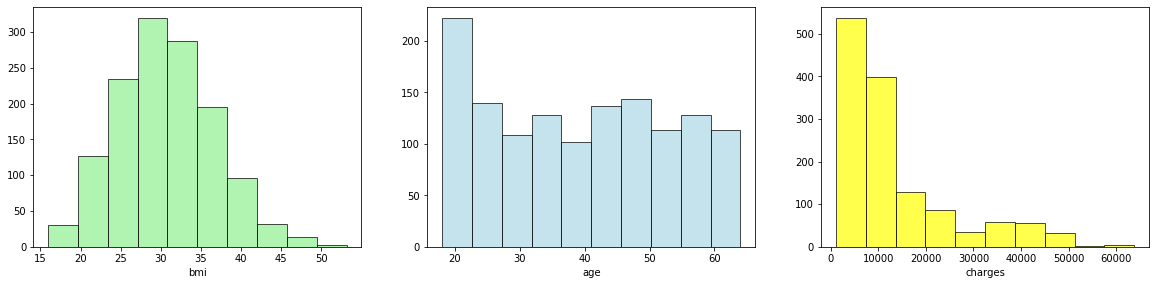

In [67]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='yellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()



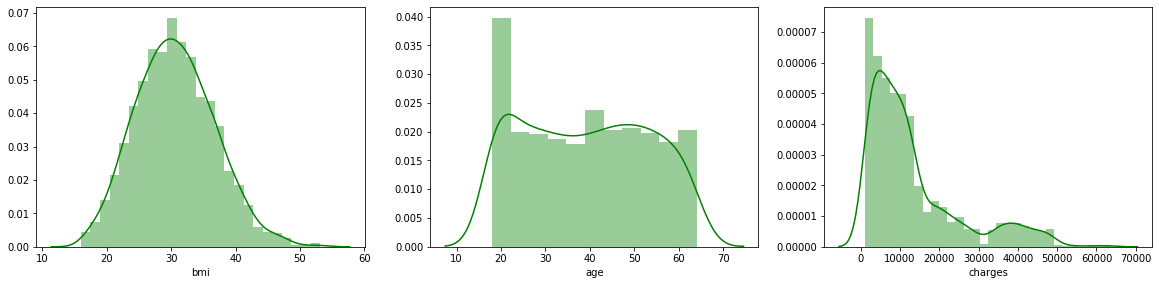

In [102]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(df.bmi, color='green')
plt.xlabel('bmi')

plt.subplot(3,3,2)
sns.distplot(df.age, color='green')
plt.xlabel('age')

plt.subplot(3,3,3)
sns.distplot(df.charges, color='green')
plt.xlabel('charges')

plt.show()

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns.

In [14]:
#Skewness table for categorical attributes

skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


<h4>
<ul>
    <li> - skew of bmi is less </li>
    <br>
    <li> - skew of ages data is very low </li> 
    <br>
    <li> - skew of charges data is high </li>
</ul>
</h4>    

___
### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns.

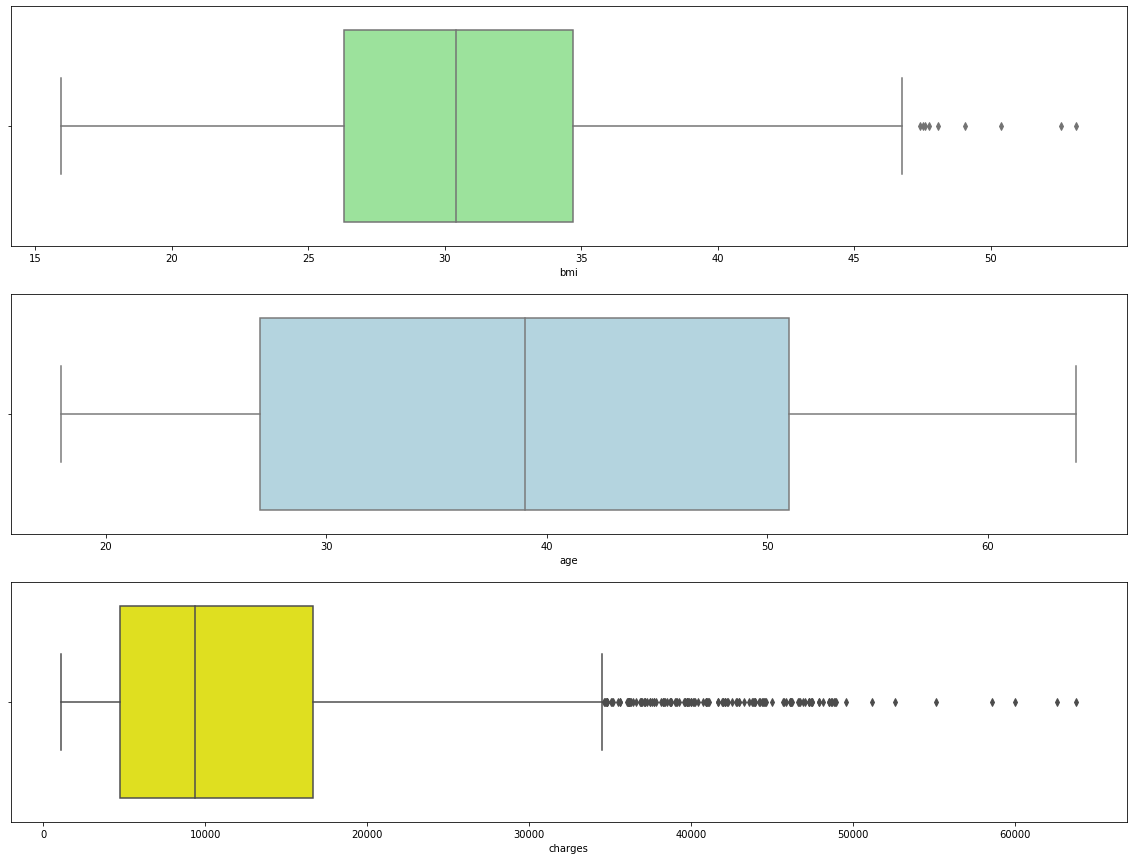

In [68]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(df['bmi'], color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(df['age'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(df['charges'], color='yellow')

plt.show()


In [147]:
#To see the 25 and 75 percentile of 'age', 'bmi' and 'charges' attribute 
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [195]:
q1,q3= np.percentile(df['charges'],[25,75])

#Outliers in charges attributes

if (df[df['charges']>(q3+(q3-q1)*1.5)]['charges'].count()) > 0 :
        print('Total outlier in charges attributes ',df[df['charges']>(q3+(q3-q1)*1.5)]['charges'].count())
else:
        print('There is no outlier in charges attribute ')

Total outlier in charges attributes  139


In [193]:
q1,q3= np.percentile(df['age'],[25,75])

#Outliers in age attributes

if (df[df['age']>(q3+(q3-q1)*1.5)]['age'].count()) > 0 :
        print('Total outlier in age attributes ',df[df['age']>(q3+(q3-q1)*1.5)]['age'].count())
else:
        print('There is no outlier in age attribute ')

There is no outlier in agen attribute 


In [194]:
q1,q3= np.percentile(df['bmi'],[25,75])

#Outliers in age attributes

if (df[df['bmi']>(q3+(q3-q1)*1.5)]['bmi'].count()) > 0 :
        print('Total outlier in bmi attributes ',df[df['bmi']>(q3+(q3-q1)*1.5)]['bmi'].count())
else:
        print('There is no outlier in bmi attribute ')


Total outlier in bmi attributes  9


<h4>
<ul>
    <li> - bmi has a some extreme values (outliers). </li>
    <br>
    <li> - attribute 'charges' has many extreme values(outliers). </li>
    <br>
    <li> - attribute 'charges' has highly skewed data.</li>
    <br>
    <li> - data of 'age' attriute is equally distributed. </li>
    <br>
    <li> - There is no Outlier in 'age' attribute.</li>
</ul>
</h4>

___
#### h. Distribution of categorical columns (include children).

In [20]:
#Change the datatype of 'children' attribute from 'int64' to 'object' as this is categorical attribute 
df['children']=df['children'].astype('object')

In [73]:
# first 5 lines of Categorical attributes
df.select_dtypes(['object']).head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [224]:
#distinct values in catogorical attributes
print('Distinct values in sex attribute', df['sex'].unique(),"\n")

print('Distinct values in children attribute',df['children'].unique(),"\n")

print('Distinct values in smoker attribute',df['smoker'].unique(),"\n")

print('Distinct values in region attribute',df['region'].unique(),"\n")


#Stattistics of categorical attributes

print('Statistics of categorical attributes\n')
print(df.describe(include='O'))

Distinct values in sex attribute ['female' 'male'] 

Distinct values in children attribute [0 1 3 2 5 4] 

Distinct values in smoker attribute ['yes' 'no'] 

Distinct values in region attribute ['southwest' 'southeast' 'northwest' 'northeast'] 

Statistics of categorical attributes

         sex  children smoker     region
count   1338      1338   1338       1338
unique     2         6      2          4
top     male         0     no  southeast
freq     676       574   1064        364


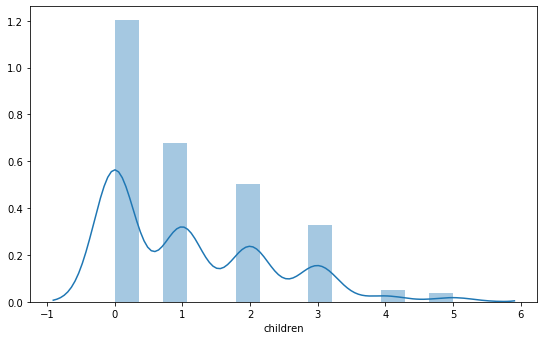

In [115]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,2)
sns.distplot(df['children'])


plt.show()

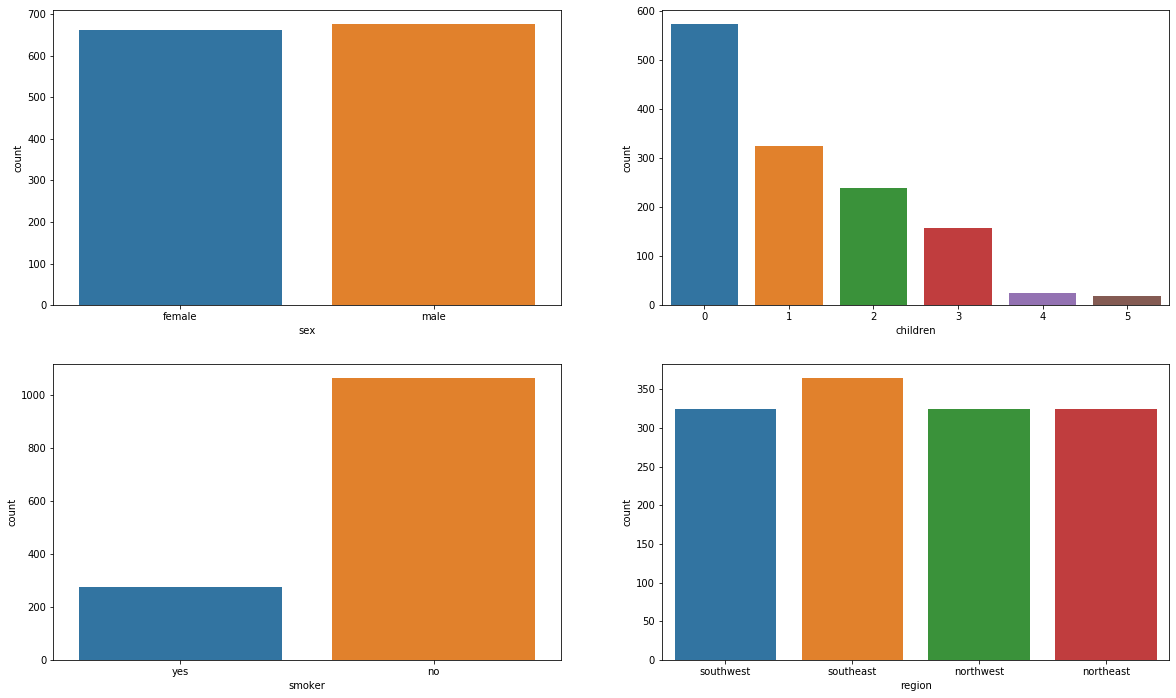

In [121]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(df['sex'])

plt.subplot(4,2,2)
sns.countplot(df['children'])

plt.subplot(4,2,3)
sns.countplot(df['smoker'])

plt.subplot(4,2,4)
sns.countplot(df['region'])

plt.show()

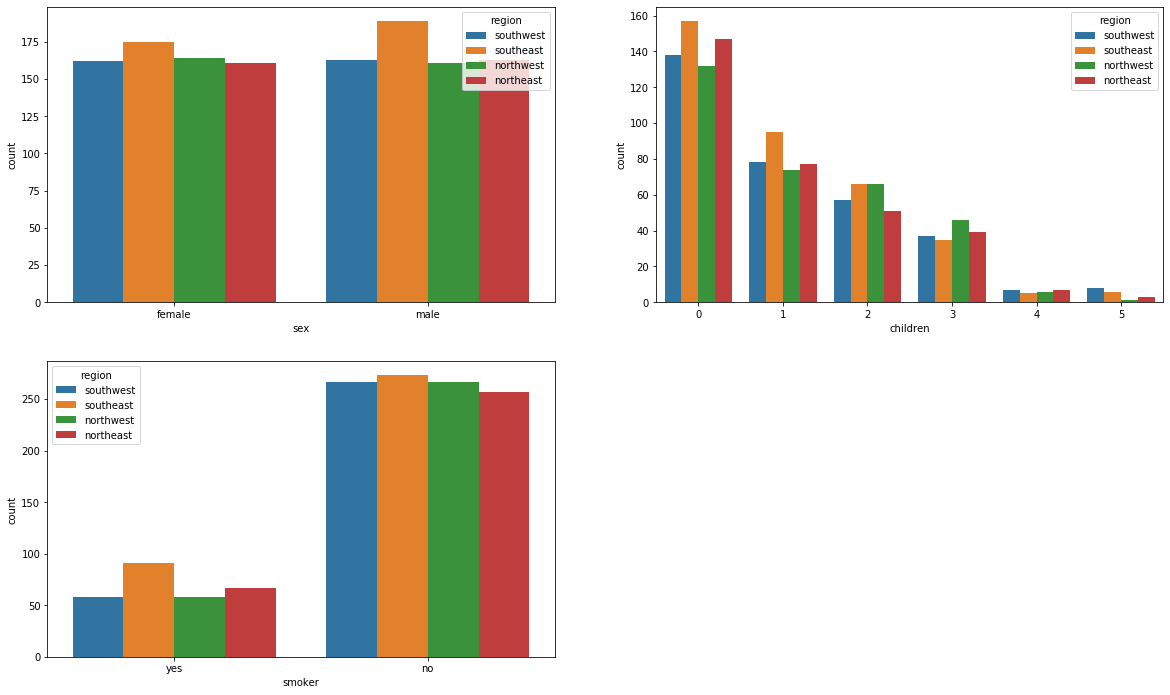

In [122]:
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(df['sex'],hue=df['region'])

plt.subplot(4,2,2)
sns.countplot(df['children'],hue=df['region'])

plt.subplot(4,2,3)
sns.countplot(df['smoker'],hue=df['region'])


plt.show()

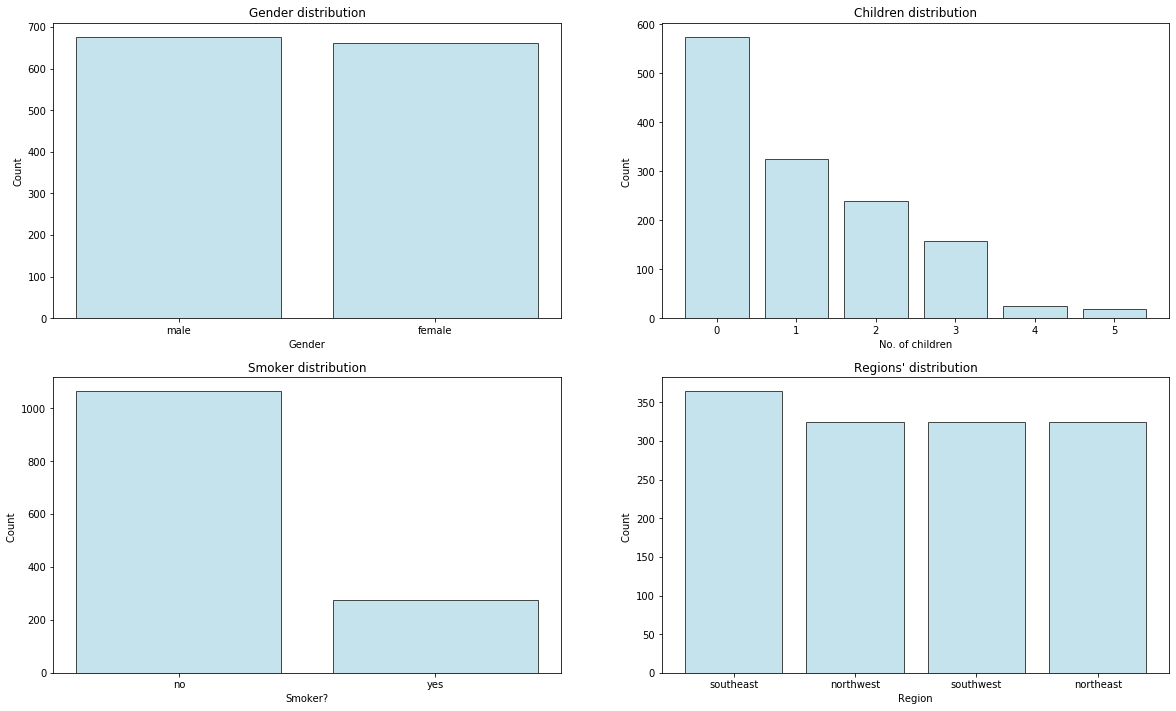

In [108]:
plt.figure(figsize=(20,25))



x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis


plt.subplot(4,2,1)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')


x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis


plt.subplot(4,2,3)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")


plt.show()

In [233]:
#count of smoker and non-smoker

print('cout of smoker and non-smoker\n',df['smoker'].value_counts(),"\n")

cout of smoker and non-smoker
 no     1064
yes     274
Name: smoker, dtype: int64 



In [27]:
#count of people who has 0,1,2,3,4 children

print('count of people having 0,1,2,3,4 and 5 chilren \n',df['children'].value_counts(),"\n")

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [232]:
#count of male and female members

print('count of male and female \n',df['sex'].value_counts(),"\n")

count of male and female 
 male      676
female    662
Name: sex, dtype: int64 



In [231]:
#region wise count of people

print('Region wise count of people \n', df['region'].value_counts(),"\n")

Region wise count of people 
 southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64 



<h4>
<ul>
    <li> - smoker count is very low in Comparision of Non-smoker's count   </li>
    <br>
    <li> - Genders are equally distributed </li>
    <br>
    <li> - Data is normally distributaed over Region</li>
    <br>
    <li> - Very few members have 4 & 5 children while most of the members have less than or equal to 2 children</li>
    <br>
    <li> - Most of the memeber has no child </li>
</ul>
</h4>

___
#### i. Pair plot that includes all the columns of the data frame.

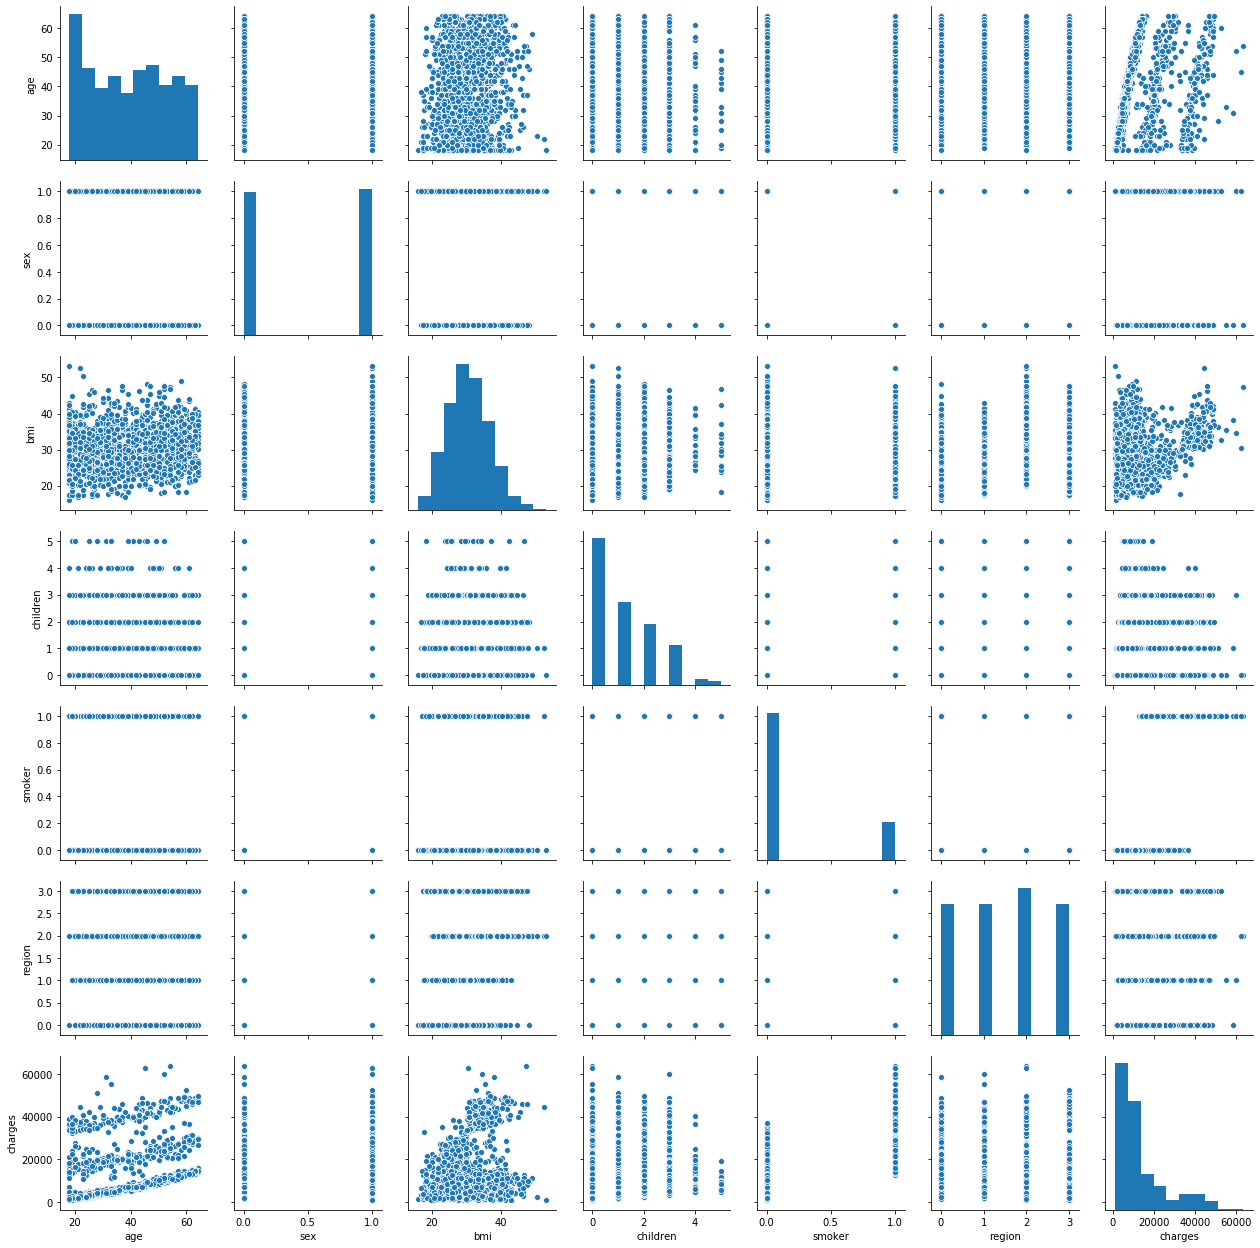

In [24]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [241]:
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


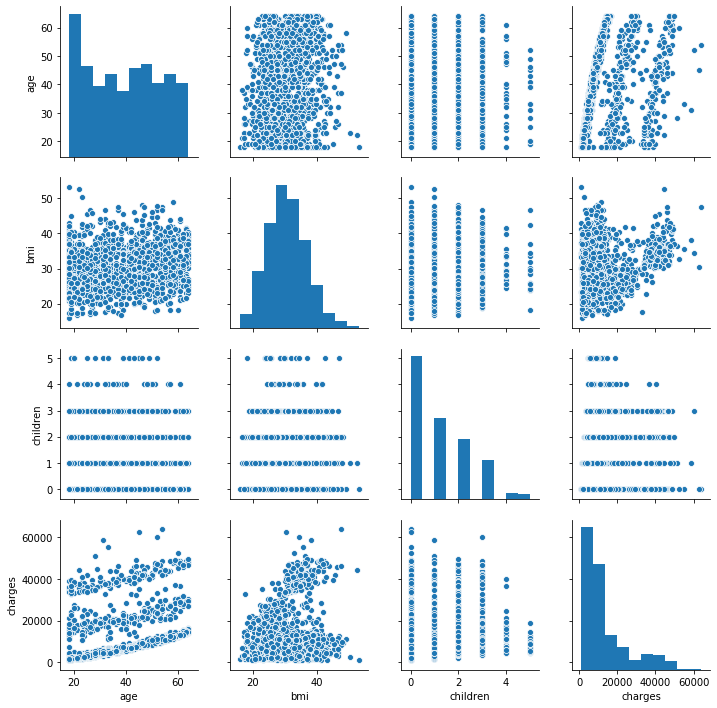

In [238]:
sns.pairplot(df)

#### - The only obvious correlation of 'charges' is with 'smoker'
#### - Looks like smokers claimed more money than non-smokers
#### - There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

## 4. Answer the following questions with statistical evidence
####     a. Do charges of people who smoke differ significantly from the people who don't?

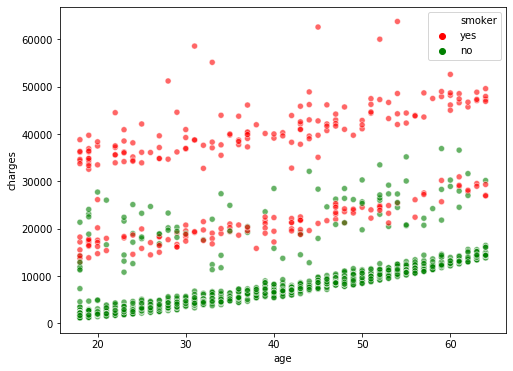

In [31]:
#define the plot size
plt.figure(figsize=(8,6))

#scatter plot between charges and smoker over the age
sns.scatterplot(df['age'], df['charges'],hue=df['smoker'],palette=['red','green'],alpha=0.6)
plt.show()

#### Yes, charges of people who smoke differ significantly (higher charges) from the people who don't smoke

In [136]:
#average charges for smoker and non-smoker

df.groupby(['smoker']).mean()['charges']

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [138]:
#age-wise average charges for smoker and non-smoker

df.groupby(['age','smoker']).mean()['charges']

age  smoker
18   no         3215.162259
     yes       25473.730221
19   no         3536.712898
     yes       27001.232768
20   no         3673.112925
                   ...     
62   yes       37084.607312
63   no        14205.335706
     yes       40331.784380
64   no        15805.350545
     yes       39283.060036
Name: charges, Length: 94, dtype: float64

In [139]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')



Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


___
### 4. b. Does bmi of males differ significantly from that of females?

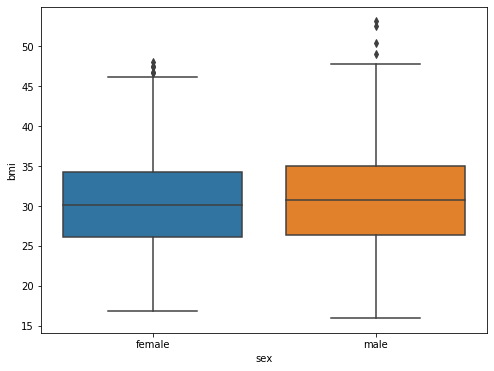

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(df.sex, df.bmi  )
plt.show()

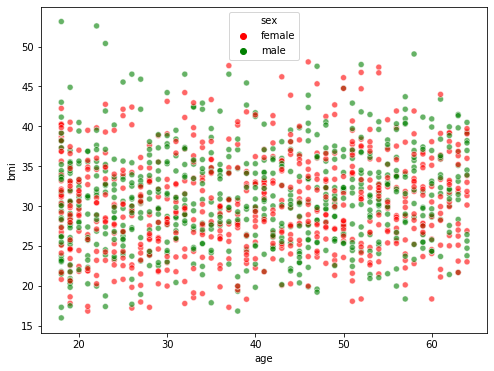

In [237]:
#define the plot size
plt.figure(figsize=(8,6))

#scatter plot between charges and smoker over the age
sns.scatterplot(df['age'], df['bmi'],hue=df['sex'],palette=['red','green'],alpha=0.6)
plt.show()

#### as per boxplot and scatterplot there is no significantly differnce in bmi of male and female

In [235]:
#Gender-wise average bmi
print('Gender wise average bmi \n')
df.groupby(['sex']).mean()['bmi']

Gender wise average bmi 



sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [236]:
#Age-wise gender's average bmi 
print('Age-wise and gender-wise average bmi \n')
df.groupby(['age','sex']).mean()['bmi']

Age-wise and gender-wise average bmi 



age  sex   
18   female    32.930909
     male      29.855139
19   female    29.051667
     male      28.168143
20   female    29.421429
                 ...    
62   male      31.662273
63   female    30.067917
     male      33.947727
64   female    33.084545
     male      32.867727
Name: bmi, Length: 94, dtype: float64

In [33]:
# T-test to check dependency of bmi on gender

# Stating the Null Hypothesis
Ho = "Gender has no effect on bmi"   

# Stating the Alternate Hypothesis
Ha = "Gender has an effect on bmi"   

# Selecting bmi values corresponding to males as an array
x = np.array(df[df.sex == 'male'].bmi)  

# Selecting bmi values corresponding to females as an array
y = np.array(df[df.sex == 'female'].bmi) 

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')



Gender has no effect on bmi as the p_value (0.09) > 0.05


### hence there is no significantly difference in bmi of both gender male and female

___
### 4. c. Is the proportion of smokers significantly different in different genders?

In [37]:
#gender wise smoker counts
df1=df.copy()
df1['count']=1
df1.groupby(['sex','smoker']).count()['count']

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: count, dtype: int64

In [38]:
#crosstable for gender and smoker
crosstab = pd.crosstab(df['sex'],df['smoker'])
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


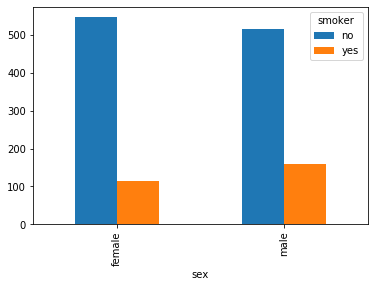

In [42]:
#bar plot for cross table of gender and smoker
crosstab.plot.bar()
plt.show()

In [40]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')



Gender has an effect on smoking habits as the p_value (0.007) < 0.05


### 4. d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [216]:
#Women count in data frame
print(df['sex'].value_counts())

df1=df[df['sex']=='female']

print('Shape of Women data frame',df1.shape)


male      676
female    662
Name: sex, dtype: int64
Shape of Women data frame (662, 7)


In [234]:
#Children count wise , women average bmi
print('Average bmi of women having 0,1,2,3,4 and 5 children \n')
df1.groupby(['children']).mean()['bmi']

Average bmi of women having 0,1,2,3,4 and 5 children 



children
0    30.361522
1    30.052658
2    30.649790
3    30.436429
4    31.943182
5    30.620625
Name: bmi, dtype: float64

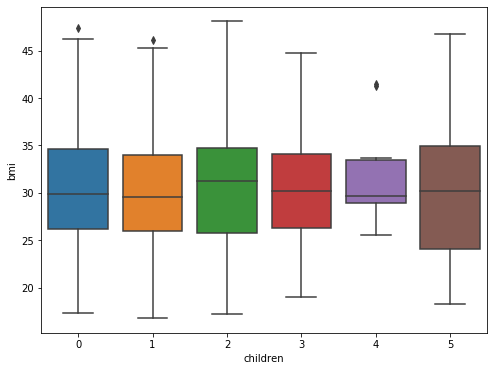

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(df3.children, df.bmi  )
plt.show()

### Visually the distribution of bmi across women with no children, one child and two <br>children are similar means no effect

In [63]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
